<a href="https://colab.research.google.com/github/creaturerigger/MLNotebooks/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get Your Hands Dirty: Logistic Regression from Scratch in Python and Mathematics Behind

##1. Introduction
Python modules/frameworks like scikit-learn, TensorFlow, PyTorch etc., are widely used by machine learning community members, by which you can easily apply logistic regression on a dataset with just a few lines of code. Unless you scrutinize the source code, you won't understand what goes on behind the scenes. In this and my first article, I will give some details about the mathematics behind logistic regression, how we can implement logistic regression in Python, and why we do something to achieve some other things.


As a statistical model, the logistic model is predominantly a classification and a predictive model. The logistic model determines the probability of a binary outcome (e.g., "sick" versus "not sick") based on one or more predictors (i.e., independent variables), and the log odds (i.e., logit) of the outcome is a linear combination of the predictors, transformed by the logistic function to produce a probability. Straightforwardly, it means that we have one or more independent variables and a dependent variable such as "sick" or "not sick", and we are to determine the probability of being sick depending on independent variables. On the other hand, logistic regression helps us to approximate the parameters of a logistic model by applying some methods such as Gradient Descent, and Newton's Method etc. In this article, I will explain how these optimizations are used to estimate the model parameters.

##2. Prerequisites
You might want to consider having some basic knowledge of the following topics to have a better grasp of what this article says:


*   Calculus
*   Probability and statistics
*   Linear Algebra
*   Python



##3.The math
###3.1. What is logistic function and why we need it?
Let's talk about why we need logistic function. Remember, just few lines above we mentioned that with logistic regression we aim to build a model capable of determining the probability of a binary outcome. I will make it a bit more clear with the following example. To determine whether a patient is sick or not depending on some independent variables namely blood test results, health history etc., we aim to end up with a result either "one" that represents "sick" or "zero" to represent "not sick". What do all that mean? So, it basically means we need a function that will give us either 0 or 1, and this function is logistic function. Now, let's investigate the logistic function also known as sigmoid function and how its chart looks like.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_data(x_data, x_label, y_label, _title, y_data=None):
  """A simple function to plot a line chart
    
    Parameters
    ----------
    x_data, y_data : array-like or scalar
        The coordinates of the data points
    
    x_label: string
        The label of x axis of the chart

    y_label: string
        The label of y axis of the chart

    _title: string
        The title of the chart
  """

  fig, ax = plt.subplots()
  if y_data.any() == None:
    ax.plot(x_data)
  else:
    ax.plot(x_data, y_data)

  ax.set(xlabel=x_label, ylabel=y_label,
        title=_title)
  ax.grid()
  plt.show()

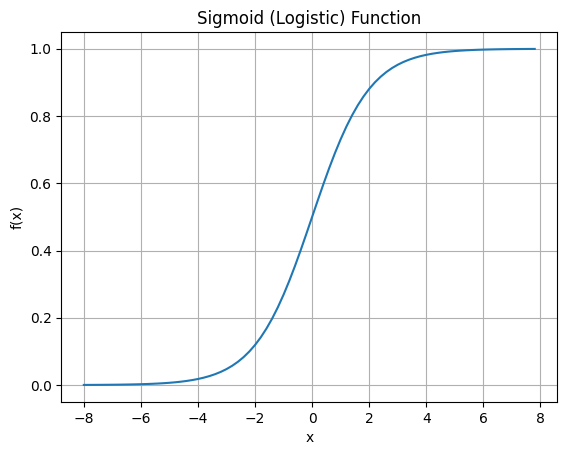

In [ ]:
# Create a range between -8 and 8 with step size 0.2
logistic_x = np.arange(-8, 8, 0.2)
# Create a lambda function for logistic function
logistic_f_x = lambda x, x_0, k, L : L / (1 + np.exp(-k * (x - x_0)))
logistic_y = logistic_f_x(x=logistic_x, x_0=0, k=1, L=1)
# Plot the chart
plot_data(logistic_x, "x", "f(x)", "Sigmoid (Logistic) Function",
          y_data=logistic_y)

As we can see from the chart that when x approaches to positive infinity logistic function gives us 1 and when x approaches to negative infinity logistic function gives us 0. That fits perfectly for our aim we mentioned above. But before we jump onto the next step let's take a look at logistic function's algebraic representation.

$f(x) = \dfrac{L}{1 + e^{-k(x - x_0)}}$

In the equation above L is the supremum of the co-domain values, k is the steepness of the curve, and x nought is x value of the mid-point of the function. In our case we want the logistic function to result in either zero or one so we can specify L as 1, k as 1 and x nought as 0. This special case of logistic function is called as sigmoid function and it's representation is as follows.

$S(x) = \dfrac{1}{1 + e^{-x}}$

###3.2. Logistic model
Since we learned what is logistic function and why we need it, we can start talking about logistic model. In logistic regression we assume that we can model the probability of the target variable y, given the independent variables and the parameters by using logistic function. In this connection, we can define logistic function as the hypothesis function.

$$P(y\mid x;\theta) = h_\theta(x) = \dfrac{1}{1 + e^{-\theta^Tx}}$$

If you remember, we said that we want to get a binary outcome from logistic model so let's write down the hypothesis function for both cases.

$$P(y = 1\mid x;\theta) = h_\theta(x)$$
\
$$P(y = 0\mid x;\theta) = 1 - h_\theta(x)$$

Isn't this familiar from somewhere? If it is not don't worry about it. But these two equations are the same as probability mass function of Bernoulli Distribution.

$$f(k; p) = \left\{
\begin{array}{11}
  p & \text{if } k = 1,\\
  q = 1-p & \text{if } k = 0\\
\end{array}\right.$$

If we combine these two equations we will end up with the joint probability function or likelihood function.

$$P(y\mid x;\theta) = [h_\theta(x)]^{y} \times [1 - h_\theta(x)]^{1 - y}$$

So if y = 1, then multiplicand will be evaluated and if y = 0, then the multiplier will be evaluated.

###3.3. Likelihood Function and Loss Function
We need some function to measure how good our model fits the observations. During the computation to get the best parameters for the hypothesis function we will use gradient descent as a numerical method to update parameters. So, in each iteration this function will help us to measure how good the model is fitting which means how small the difference between the actual y values and the predicted y values and the derivation of this function will help us to update parameters of the hypothesis function by reducing them gradually. Since we will differentiate this function we first have to transform it into a function that will be differentiated easily. In logistic regression we assume that the observations are independent and identically distributed. Therefore for all observations the likelihood function can be written as follows:

\\

$$L(\theta \mid X, y) = P(y_1, y_2,\ldots,y_n\mid x_1, x_2, \ldots , x_n, \theta)$$

\\

$$= \prod_{i=1}^n P(y_{i} \mid x_{i};\theta)$$

\\

$$=\prod_{i=1}^n\left(\dfrac{1}{1 + e^{-\theta^Tx_i}}\right)^{y_i}\left(1 - \dfrac{1}{1 + e^{-\theta^Tx_i}}\right)^{1 - y_i}$$

\\

The goal of logistic regression is to find the values of parameters that maximise the likelihood function, which is equivalent to minimising the negative log-likelihood function. To maximize the likelihood function we can take the derivative of it with respect to theta and set it to zero, and solve for theta. But, it seems to be easier to work with the log-likelihood function which is the logarithm of the likelihood function:

\\

$$l(\theta \mid X, y) = logL(\theta \mid X, y)$$

\\

$$
=\dfrac{1}{n} \sum_{i=1}^ny_i \, log \, P(y_i=1 \mid x_i, \theta) + (1 - y_i) \, log \, (1 - P(y_i=1 \mid x_i, \theta))
$$

\\

$$
=\dfrac{1}{n} \sum_{i=1}^n\left[y_i \, log \,  \left(\dfrac{1}{1 + e^{-\theta^Tx_i}}\right) + (1 - y_i)log\left(1 - \dfrac{1}{1 + e^{-\theta^Tx_i}}\right)\right]
$$

\\

But since we aim to maximize the likelihood function we have to take the negative of log likelihood function and the negative log-likelihood function will become:

\\

$$
= -\dfrac{1}{n} \sum_{i=1}^n\left[y_i \, log \,  \left(\dfrac{1}{1 + e^{-\theta^Tx_i}}\right) + (1 - y_i)log\left(1 - \dfrac{1}{1 + e^{-\theta^Tx_i}}\right)\right]
$$

\\

The function above is our loss function for logistic regression, and it's also known as cross entropy of the predicted distribution.

Note: As an informal proof that maximizing a function is equivalent to minimizing its negative log function we can say let f(x) be the function we want to maximize over some domain D, let's say x nought is the value that maximizes f(x), and we want to show that x nought also minimizes -log(f(x)). In this case we can use the fact that the natural logarithm function is a monotonically increasing function that means if we take the logarithm of two numbers a and b, then a is greater than b if and only if log(a) > log(b).

So, since f(x) is maximized at some point x nought, we have f(x) <= f(x_0) for all x in D. Taking the negative logarithm of both sides and using the fact that log(1/x) = -log(x), we get -log(f(x)) >= -log(f(x_0)). Since -log(f(x)) is the negative log of f(x), then minimizing the negative log of a function is equivalent to maximizing the function itself.

###3.4. Gradient Descent and Updating Parameters
To update parameters we have to differentiate the loss function with respect to parameters which is theta vector and set it to zero then solve it. However, doing this for all training examples at once will be costly and inefficient. Instead, we will use an iterative algorithm and update the parameter vector in every iteration. One of the most commonly used algorithm is gradient descent, and it is an algorithm by which we iteratively move in the direction of the steepest descent to find the minimum of a function until we reach a point that makes the gradient zero. Let's see it in action with a simple example.

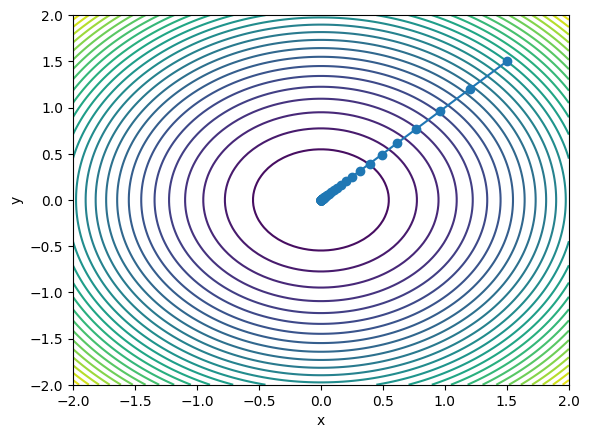

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return x[0] ** 2 + x[1] ** 2

def grad_f(x):
  return np.array([2*x[0], 2*x[1]])

def gradient_descent(f, grad_f, init_x, learning_rate=0.1, num_iterations=100):
  x = init_x
  x_hist = [x]
  for i in range(num_iterations):
    grad = grad_f(x)
    x = x - learning_rate * grad
    x_hist.append(x)
  return x_hist

init_x = np.array([1.5, 1.5])
x_hist = gradient_descent(f, grad_f, init_x)

x_dummy = np.linspace(-2, 2, 100)
y_dummy = np.linspace(-2, 2, 100)
X_dummy, Y_dummy = np.meshgrid(x_dummy, y_dummy)
Z_dummy = f([X_dummy, Y_dummy])
fig, ax = plt.subplots()
ax.contour(X_dummy, Y_dummy, Z_dummy, levels=30)
ax.plot([x[0] for x in x_hist], [x[1] for x in x_hist], '-o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In this chart the function that we want to get its minimum is z = x^2 + y^2. And we set parameters which are x and y in this example as 1.5 initially then iterated through number of iterations which is 100 and aproximated to the minimum of the function. In this case we have to differentiate the loss function to get the gradient of the negative log likelihood function to be able to update parameters. Gradient of the loss function (negative log likelihood) function can be computed as follows:

\\

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

\\

So now we can update parameters iteratively since we know how to compute the gradient of the loss function and we can update the parameters as follows:

$$
\theta := \theta - \alpha \times \frac{\partial J(\theta)}{\partial \theta}
$$

\\

In the equation above we don't directly subtract the derivative of the loss function from theta to prevent taking big steps which might cause gradient descent not to be able to reach to the minimum. That's why we use a hyperparameter alpha which can be tuned during training.

##4. The Code
We will use the [Iris Flower Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to classify first two classes which has four features that are sepal length, sepal width, petal length, and petal width. In the dataset for each class there are 50 examples. First let's import necessary libraries.

In [ ]:
import pandas as pd
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
from dataclasses import dataclass

We define a class named as LogisticRegression and it has three attributes which are learning rate, number of iterations, and theta.

In [ ]:
class LogisticRegression:
  def __init__(self, learning_rate: float = 0.01, iterations: int = 150) -> None:
    self._learning_rate = learning_rate
    self._iterations = iterations
    self._theta = np.zeros((0, 0))
    
  @property
  def learning_rate(self) -> float:
    return self._learning_rate

  @learning_rate.setter
  def learning_rate(self, lr: float) -> None:
    self._learning_rate = lr

  @learning_rate.getter
  def learning_rate(self) -> float:
    return self._learning_rate

  def _init_theta(self, shape: tuple) -> None:
    self._theta = np.zeros(shape)

We define the methods of the class separately to demonstrate the coding part step by step. First we define the sigmoid method which we will use in hypothesis function. Names of the methods are selected compatibly with the context of this article. After the definition of each method we will assign it them as the class methods.

In [ ]:
def _sigmoid(self, X):
  return 1 / (1 + np.exp(-X))

LogisticRegression._sigmoid = _sigmoid

We defined hypothesis function below and assigned it both as predict and hypothesis function methods of the class to prevent possible conflict.

In [ ]:
def _hypothesis_function(self, X):
  return self._sigmoid(np.dot(X, self._theta))

LogisticRegression._hypothesis_function = _hypothesis_function
LogisticRegression.predict = _hypothesis_function

Let's define the loss function depending on the mathematical expression we computed above:

In [ ]:
def _loss_function(self, X, y):
  y_hat = self._hypothesis_function(X)
  m = X.shape[0]
  return (-1 / m) * np.sum(np.multiply(y, np.log(y_hat)) + np.multiply((1 - y), np.log(1 - y_hat)))

LogisticRegression._loss_function = _loss_function

Now it's time to define the fit method which will give us the optimized parameters vector and loss history.

In [ ]:
def fit(self, X, y):
  m = X.shape[0]
  n = X.shape[1]
  self._init_theta((n, 1))
  J_history = []
  J_history.append(self._loss_function(X, y))
  for i in range(self._iterations):
    y_hat = self._hypothesis_function(X)
    grad = np.dot(X.T, (y_hat - y)) / (X.shape[0])
    self._theta = self._theta - (self._learning_rate * grad)
    loss = self._loss_function(X, y)
    J_history.append(loss)
  return self._theta, J_history

LogisticRegression.fit = fit

To reduce the scale differences between features we will normalize the dataset before fitting. So our feature distributions will have zero mean and one as standard deviation.

In [ ]:
def normalize(self, X):  
  mu = np.mean(X)
  sigma = np.std(X)
  X_norm = (X - mu) / sigma
  return X_norm, mu, sigma

LogisticRegression.normalize = normalize

To measure how good our model fit the distribution of the observations we define a method that will give us the accuracy as percentage.

In [ ]:
def accuracy(self, X_test, y_test) -> float:
  y_pred = (log_reg.predict(X_test) >= 0.5000).astype(int)
  accuracy = np.mean(y_pred == y_test) * 100
  return accuracy

LogisticRegression.accuracy = accuracy

The following method will help us to plot a simple line chart to show us the loss history.

In [ ]:
def plot_data(x_data, x_label, y_label, _title, y_data=None):
  fig, ax = plt.subplots()
  if y_data.any() == None:
    ax.plot(x_data)
  else:
    ax.plot(x_data, y_data)

  ax.set(xlabel=x_label, ylabel=y_label,
        title=_title)
  ax.grid()
  plt.show()

Now let's load Iris Flower Data Set from sklearn.datasets and split it into features (x) and targets or labels (y). Then we split this data into 80%/20% as training and test data sets respectively. (You can read why we picked 42 as random_state from [here](https://www.independent.co.uk/life-style/history/42-the-answer-to-life-the-universe-and-everything-2205734.html))

In [ ]:
iris_data = ds.load_iris()
X_iris, y_iris = iris_data["data"][:-50, :], iris_data["target"][:-50]
y_iris = y_iris.reshape((y_iris.shape[0], 1))
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.20, random_state=42)

We set learning rate as 0.1, number of iterations as 1500, initial theta as random numbers of the shape (5, 1) below.

In [ ]:
learning_rate = 0.1
iterations = 1500
initial_theta = np.random.randn(5, 1)
log_reg = LogisticRegression(learning_rate, iterations)

x0_train = np.ones(X_train.shape[0])
X_train_norm, mu, sigma = log_reg.normalize(X_train)
X_train_norm = np.insert(X_train_norm, 0, x0_train, axis=1)
x0_test = np.ones(X_test.shape[0])
X_test_norm, mu, sigma = log_reg.normalize(X_test)
X_test_norm = np.insert(X_test_norm, 0, x0_test, axis=1)

In [ ]:
initial_theta, loss_history = log_reg.fit(X_train_norm, y_train)

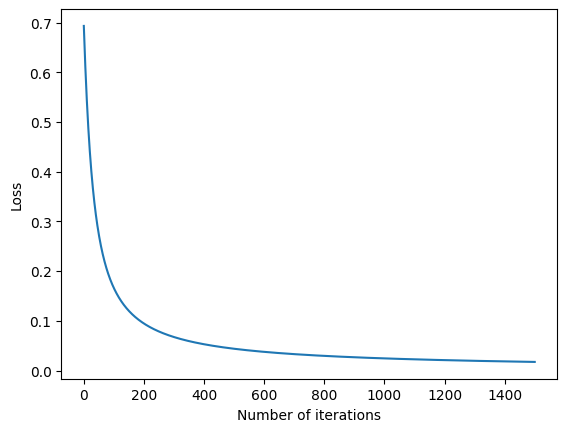

In [ ]:
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.plot(loss_history)

Finally, let's check the accuracy of our model by testing it with the test dataset which we splitted before.

In [ ]:
accuracy = log_reg.accuracy(X_test_norm, y_test)
accuracy

100.0

Thank you for reading until here :). If you like it please click on applause and follow me for more articles.

Note: Most of the discussions I used in this article is based on Stanford's CS229 lecture notes and Wikipedia.